## Course Description
Linear regression and logistic regression are the two most widely used statistical models and act like master keys, unlocking the secrets hidden in datasets. This course builds on the skills you gained in "Introduction to Regression in R", covering linear and logistic regression with multiple explanatory variables. Through hands-on exercises, you’ll explore the relationships between variables in real-world datasets, Taiwan house prices and customer churn modeling, and more. By the end of this course, you’ll know how to include multiple explanatory variables in a model, understand how interactions between variables affect predictions, and understand how linear and logistic regression work.

## 1 Parallel Slopes
0%
Extend your linear regression skills to "parallel slopes" regression, with one numeric and one categorical explanatory variable. This is the first step towards conquering multiple linear regression.

1. Parallel slopes linear regression
Hi, I'm Richie. Welcome!

2. The previous course
This course builds on the skills from the previous course.

3. From simple regression to multiple regression
In that last course, you performed linear and logistic regression with a single explanatory variable. This time, you'll learn to fit models that include multiple explanatory variables. This is sometimes called "multiple regression". Including more explanatory variables in the model often gives you more insight into the relationship between the explanatory variables and the response, and can provide more accurate predictions. It's an important step towards mastering regression.

4. The course contents
Here's the plan. In Chapter 1, you'll explore parallel slopes linear regression. This is a special case of multiple linear regression, with one numeric explanatory variable and one categorical explanatory variable. Chapter 2 introduces interactions between variables and covers Simpson's Paradox, a counter-intuitive result affecting models containing categorical explanatory variables. Chapter 3 extends linear regression to even more explanatory variables, and gives some deeper insight into how linear regression works. Finally, Chapter 4 introduces multiple logistic regression, the logistic distribution, and digs into how logistic regression works.

5. The fish dataset
Here's the fish dataset from the previous course. Each row represents a fish, the mass is the response variable, and there is one numeric and one categorical explanatory variable.

6. One explanatory variable at a time
Recall that you run a linear regression by calling lm, passing a formula and a data frame. The formula has the response variable on the left and the explanatory variable on the right, with the variables separated by a tilde. Here you can see mass modeled against length. Printing the model shows the model coefficients. With a single numeric explanatory variable, you get one intercept coefficient and one slope coefficient. Let's change the explanatory variable to species. Recall that when you have a categorical explanatory variable, the coefficients are a little easier to understand if you use "plus zero" to tell R not to include an intercept in the model. Now you get one intercept coefficient for each category. That is, one coefficient for each species of fish.

7. Both variables at same time
To include both explanatory variables in the model, you combine them in the right-hand side of the formula, separated with a plus, just like you did with the zero. This time there is one slope coefficient, and one intercept coefficient for each category in the categorical variable.

8. Comparing coefficients
Examining the coefficients of each model, it's clear that the numbers are different. Notice that the slope coefficient for length, labeled length_cm, changes from thirty five to forty three once you include species in the model as well. The intercept coefficients for each species show an even bigger change. For example, once you add length into the model, bream, labeled speciesBream, changes from six hundred and eighteen to minus six hundred and seventy two.

9. Visualization: 1 numeric explanatory var
Here's the standard visualization for a linear regression with a numeric explanatory variable. You draw a scatter plot, then use geom_smooth with method equals "lm" to add a linear trend line. Setting se to FALSE prevents a standard error ribbon being drawn.

10. Visualization: 1 categorical explanatory var
For a categorical response, there are a few possible plots. The simplest one is to draw a box plot for each category. The model coefficients are the means of each category, which I've added using stat_summary with the fun-dot-y argument set to mean. shape equals 15 makes the mean point square.

11. Visualization: both explanatory vars
With a numeric and a categorical explanatory variable, you can draw a scatter plot as before. ggplot2 doesn't have an easy way to plot the model results, but fortunately one is provided by the moderndive package. In the plot the lines are parallel to each other. Consequently, this type of regression is nicknamed "parallel slopes regression", and the function to draw the lines is geom_parallel_slopes.

12. Let's practice!
Let's begin.

Fitting a parallel slopes linear regression

In Introduction to Regression in R, you learned to fit linear regression models with a single explanatory variable. In many cases, using only one explanatory variable limits the accuracy of predictions. That means that to truly master linear regression, you need to be able to include multiple explanatory variables.

The case when there is one numeric explanatory variable and one categorical explanatory variable is sometimes called a "parallel slopes" linear regression due to the shape of the predictions—more on that in the next exercise.

Here, you'll revisit the Taiwan real estate dataset. Recall the meaning of each variable.

Variable	Meaning
dist_to_mrt_station_m	Distance to nearest MRT metro station, in meters.
n_convenience	No. of convenience stores in walking distance.
house_age_years	The age of the house, in years, in 3 groups.
price_twd_msq	House price per unit area, in New Taiwan dollars per meter squared.
taiwan_real_estate is available.

Instructions 2/3
35 XP
Instructions 2/3
35 XP

Using the taiwan_real_estate dataset, model the house price (in TWD per square meter) versus the number of nearby convenience stores.
2
Model the house price (in TWD per square meter) versus the house age (in years). Don't include an intercept term.

Take Hint (-10 XP)
3
Model the house price (in TWD per square meter) versus the number of nearby convenience stores plus the house age (in years). Don't include an intercept term.

In [1]:
#install.packages("moderndive")

In [44]:
library(fst)
library(ggplot2)
library(moderndive)
library(ggplot2)
library(dplyr)
library(tidyr)
library(broom)

In [3]:
taiwan_real_estate <- read_fst("taiwan_real_estate2.fst") # read fst file

In [4]:
head(taiwan_real_estate)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
,<dbl>,<dbl>,<fct>,<dbl>
1,84.87882,10,30 to 45,11.467474
2,306.59470,9,15 to 30,12.768533
3,561.98450,5,0 to 15,14.311649
4,561.98450,5,0 to 15,16.580938
5,390.56840,5,0 to 15,13.040847
6,2175.03000,3,0 to 15,9.712557


In [5]:
# Fit a linear regr'n of price_twd_msq vs. n_convenience
mdl_price_vs_conv <- lm(price_twd_msq~n_convenience,data=taiwan_real_estate)

# See the result
mdl_price_vs_conv


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  


In [6]:
# Fit a linear regr'n of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age <- lm(price_twd_msq~house_age_years+0,data=taiwan_real_estate)

# See the result
mdl_price_vs_age


Call:
lm(formula = price_twd_msq ~ house_age_years + 0, data = taiwan_real_estate)

Coefficients:
 house_age_years0 to 15  house_age_years15 to 30  house_age_years30 to 45  
                 12.637                    9.877                   11.393  


In [7]:
# Fit a linear regr'n of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both <- lm(price_twd_msq~n_convenience+house_age_years+0,taiwan_real_estate)

# See the result
mdl_price_vs_both


Call:
lm(formula = price_twd_msq ~ n_convenience + house_age_years + 
    0, data = taiwan_real_estate)

Coefficients:
          n_convenience   house_age_years0 to 15  house_age_years15 to 30  
                 0.7915                   9.4133                   7.0852  
house_age_years30 to 45  
                 7.5110  


In [8]:
coef(mdl_price_vs_both)

n_convenience  house_age_years0 to 15 house_age_years15 to 30 
              0.7914571               9.4133247               7.0851694 
house_age_years30 to 45 
              7.5109583

Question
Look at the coefficients of mdl_price_vs_both. What is the meaning of the n_convenience coefficient?

Possible Answers

The mean number of nearby convenience stores is 0.79.

For a house with zero nearby convenience stores, the expected house price is 0.79 TWD per square meter.

##For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.

For each additional 0.79 nearby conveniences stores, the expected house price increases by 1 TWD per square meter.

Question
What is the meaning of the "0 to 15 years" coefficient?

Possible Answers

For a house aged 0 to 15 years, the mean number of nearby convenience stores is 9.41.

###For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

For each additional year of house age, the expected house price, in TWD per square meter, increases by 9.41.

For each additional 15 years of house age, the expected house price increases by 9.41 TWD per square meter.

Insightful interpretation! The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable).

Visualizing each explanatory variable

Being able to see the predictions made by a model makes it easier to understand. In the case where there is only one explanatory variable, ggplot lets you do this without any manual calculation or messing about.

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

taiwan_real_estate is available and ggplot2 is loaded.

Instructions 1/2
50 XP
1
2
Instructions 1/2
50 XP
1
2
Using the taiwan_real_estate dataset, plot the house price versus the number of nearby convenience stores.
Make it a scatter plot.
Add a smooth linear regression trend line without a standard error ribbon.

`geom_smooth()` using formula 'y ~ x'



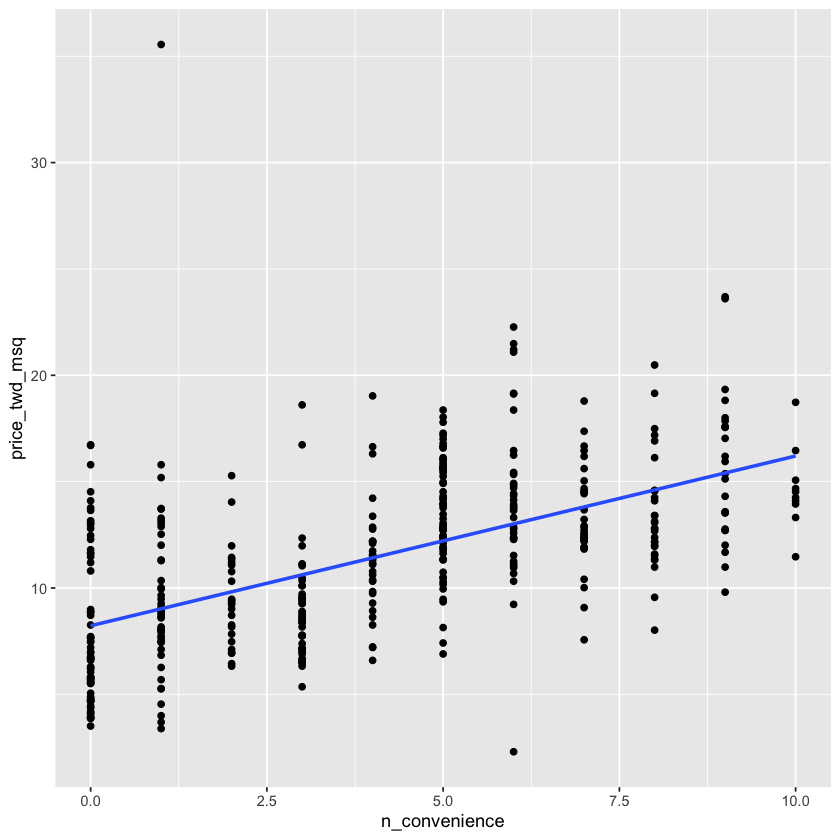

In [9]:
#Using taiwan_real_estate, plot price_twd_msq vs. n_convenience
ggplot(taiwan_real_estate,aes(n_convenience,price_twd_msq))+
  # Add a point layer
  geom_point() +
  # Add a smooth trend line using linear regr'n, no ribbon
  geom_smooth(method="lm",se=F)

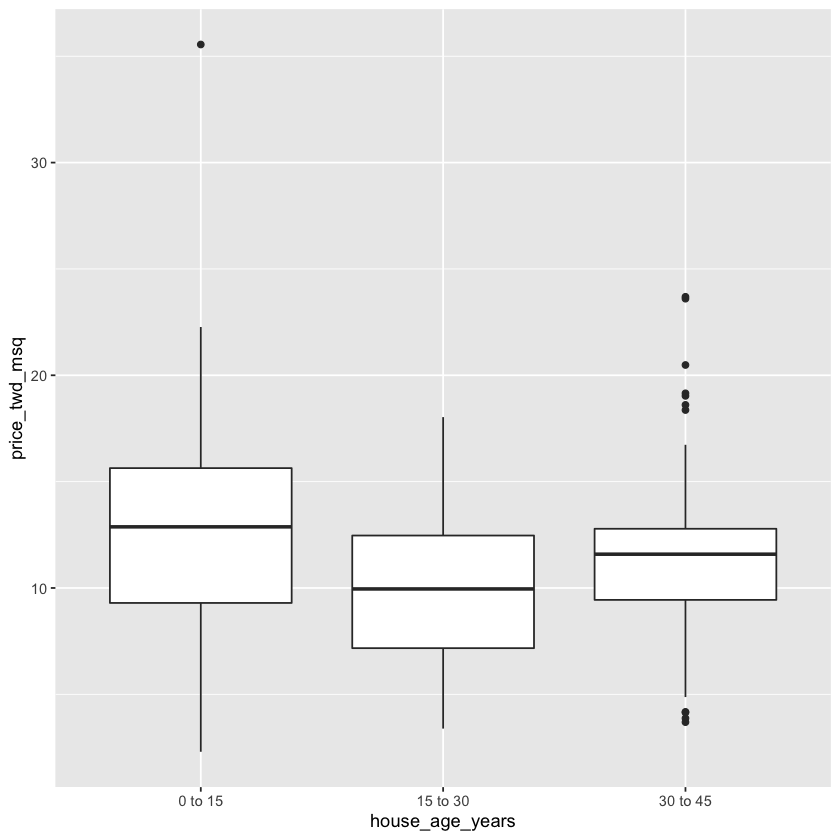

In [10]:
 #Using taiwan_real_estate, plot price_twd_msq vs. house_age_years
ggplot(taiwan_real_estate,aes(house_age_years,price_twd_msq)) +
  # Add a box plot layer
  geom_boxplot()

Veracious visualizing! With a single numeric explanatory variable, the predictions form a single straight line. With a single categorical explanatory variable, the predictions are the means for each category.

Visualizing parallel slopes

The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, ggplot2 doesn't have an easy, "out of the box" way to show the predictions. Fortunately, the moderndive package includes an extra geom, geom_parallel_slopes() to make it simple.

taiwan_real_estate is available; ggplot2 and moderndive are loaded.

Instructions
100 XP
Instructions
100 XP
Using the taiwan_real_estate dataset, plot house prices versus the number of nearby convenience stores, colored by house age.
Make it a scatter plot.
Add parallel slopes, without a standard error ribbon.

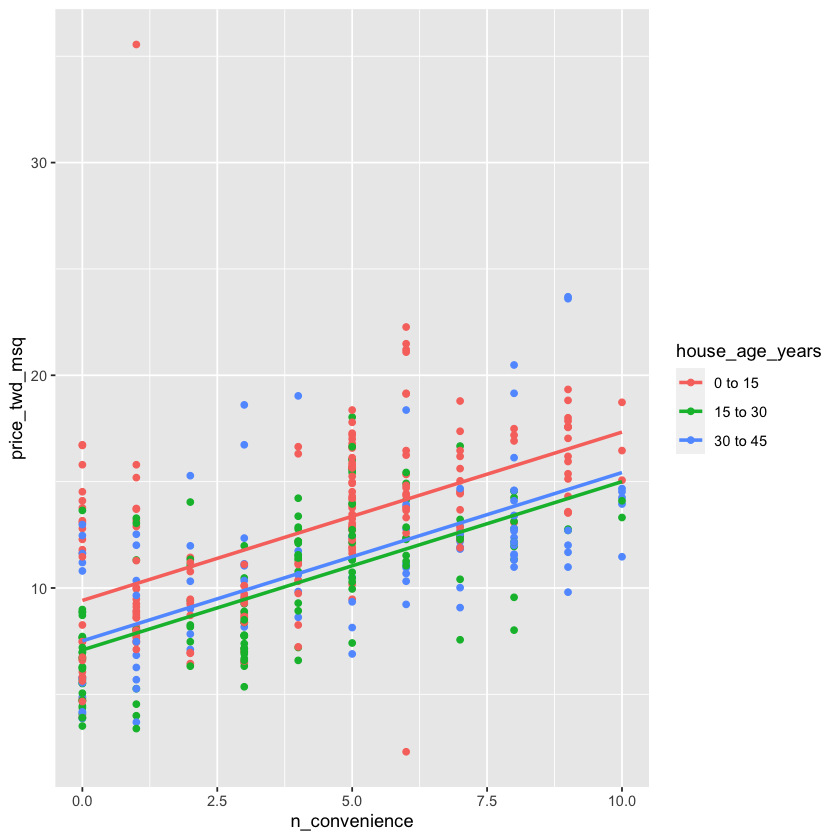

In [11]:
# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience colored by house_age_years
ggplot(taiwan_real_estate,aes(n_convenience,price_twd_msq,
color=house_age_years)) +
  # Add a point layer
  geom_point() +
  # Add parallel slopes, no ribbon
   geom_parallel_slopes(se =FALSE)

`geom_smooth()` using formula 'y ~ x'



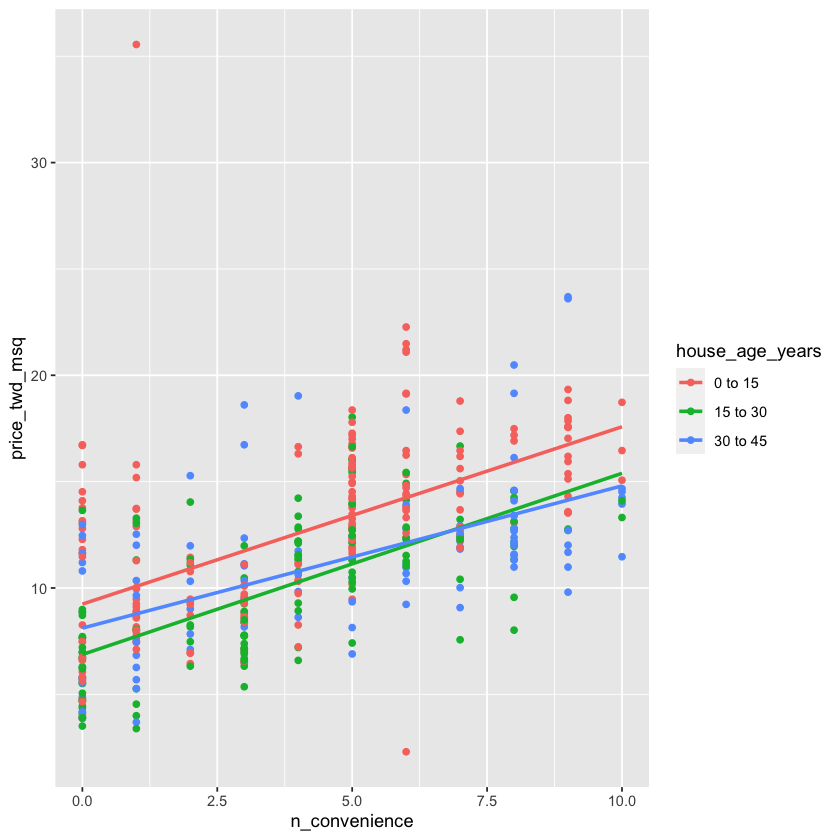

In [12]:
#but isnt this more realistic:
# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience colored by house_age_years
ggplot(taiwan_real_estate,aes(n_convenience,price_twd_msq,
color=house_age_years)) +
  # Add a point layer
  geom_point() +
  # Add 
   geom_smooth(method="lm",se =FALSE)

Parallel slope paradise! The “parallel slope” model name comes from the fact that the prediction for each category is a slope, and all those slopes are parallel.

1. Predicting parallel slopes
Predicting responses is perhaps the most useful feature of regression models. With two explanatory variables, the code for prediction has one subtle difference from the case with a single explanatory variable.

2. The prediction workflow 1
The prediction workflow starts with choosing values for explanatory variables. You pick any values you want, and store them in a data frame or tibble. For a single explanatory variable, the data frame has one column. Here, it's a sequence of lengths from 5cm to 60cm, in steps of 5cm. For multiple explanatory variables, it's the same process, but there's a useful trick. expand_grid from the tidyr package returns a data frame of all combinations of its inputs. Here, you have 5cm and each fish species, 10cm and each fish species, through to 60cm and each fish species.

3. The prediction workflow 2
Next you add a column of predictions to the data frame. To calculate the predictions, call predict, passing the model and the explanatory data. Here's the code for one explanatory variable. With two or more explanatory variables, other than the model variable name, the code is exactly the same!

4. Visualizing the predictions
Just as in the single explanatory variable case, we can visualize the predictions from the model by adding another geom_point layer and setting the data argument to prediction_data. I set the size and shape arguments to make the predictions big square points. A good sign that this worked is that the prediction points lie along the lines calculated by ggplot.

5. Manually calculating predictions
In the previous course, you saw how to manually calculate the predictions. The coefficients function extracts the coefficients from the model. The intercept is the first coefficient, and the slope is the second coefficient. Then the response value is the intercept plus the slope times the explanatory variable.

6. Coefficients for parallel slopes
For the parallel slopes model, there is an added complication. Each category of the categorical variable has a different intercept. Due to the way we specified the model, the slope coefficient is the first one.

7. Choosing an intercept with ifelse()
You can choose this intercept using if-else statements, but this becomes clunky when you have lots of categories. With just four categories, these nested calls to ifelse are hard to write and hard to read. It's a recipe for buggy code.

8. case_when()
dplyr has a function called case_when that simplifies the code. Each argument to case_when is a formula, just like you use when specifying a model. On the left-hand side, you have a logical condition. On the right-hand side, you have the value to give to those rows where the condition is met. This is very abstract, so let's look at how we use it for predictions.

9. Choosing an intercept with case_when()
The first argument to case_when has a logical condition to check for rows where the species is Bream. On the right-hand side of the formula, we give those rows the value of the bream intercept. Then we repeat this for the other species. This code does the same thing as the ifelse code, but I find it easier to write and to read.

10. The final prediction step
The final step is to calculate the response. As before, the response is the intercept plus the slope times the numeric explanatory variable. This time, the intercept is different for different rows.

11. Compare to predict()
The model predicts some negative masses, which isn't a good sign. Let's check that we got the right answer by calling predict. You can see that the predictions are the same numbers as the mass column that we calculated, so our calculations are correct. It's just that this model performs poorly for small fish lengths.

12. Let's practice!
Time for you to make predictions.

Predicting with a parallel slopes model

While ggplot can automatically show you model predictions, in order to get those values to program with, you'll need to do the calculations yourself.

Just as with the case of a single explanatory variable, the workflow has two steps: create a data frame of explanatory variables, then add a column of predictions. To make sure you've got the right answer, you can add your predictions to the ggplot with the geom_parallel_slopes() lines.

taiwan_real_estate and mdl_price_vs_both are available; dplyr, tidyr, and ggplot2 are loaded.

Instructions 1/3
35 XP
1
2
3
Make a grid of explanatory data, formed from combinations of the following variables.

n_convenience should take the numbers zero to ten.
house_age_years should take the unique values of the house_age_years column of taiwan_real_estate.

In [13]:
# Make a grid of explanatory data
explanatory_data <- expand.grid(
  # Set n_convenience to zero to ten
  n_convenience=seq(0:10),
  # Set house_age_years to the unique values of that variable
  house_age_years=unique(taiwan_real_estate$house_age_years)
)

# See the result
explanatory_data

n_convenience,house_age_years
<int>,<fct>
1,30 to 45
2,30 to 45
3,30 to 45
4,30 to 45
5,30 to 45
6,30 to 45
7,30 to 45
8,30 to 45
9,30 to 45


In [14]:
# Make a grid of explanatory data
explanatory_data <- expand_grid(
  # Set n_convenience to zero to ten
  n_convenience = 0:10,
  # Set house_age_years to the unique values of that variable
  house_age_years = unique(taiwan_real_estate$house_age_years)
)

# See the result
explanatory_data

n_convenience,house_age_years
<int>,<fct>
0,30 to 45
0,15 to 30
0,0 to 15
1,30 to 45
1,15 to 30
1,0 to 15
2,30 to 45
2,15 to 30
2,0 to 15


In [15]:
# Add predictions to the data frame
prediction_data <- explanatory_data %>% 
  mutate(
    price_twd_msq=predict(
      mdl_price_vs_both,explanatory_data
    )
  )

In [16]:
head(prediction_data)

n_convenience,house_age_years,price_twd_msq
<int>,<fct>,<dbl>
0,30 to 45,7.510958
0,15 to 30,7.085169
0,0 to 15,9.413325
1,30 to 45,8.302415
1,15 to 30,7.876627
1,0 to 15,10.204782


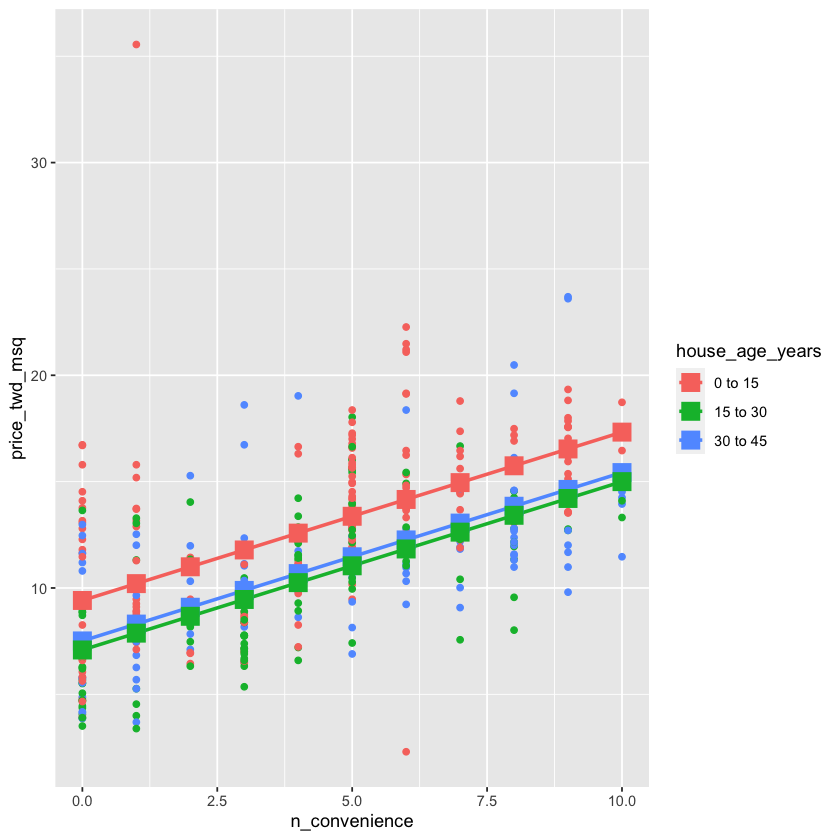

In [17]:
taiwan_real_estate %>% 
  ggplot(aes(n_convenience, price_twd_msq, color = house_age_years)) +
  geom_point() +
  geom_parallel_slopes(se = FALSE) +
  # Add points using prediction_data, with size 5 and shape 15
    geom_point(data = prediction_data,    size =5, shape =15)

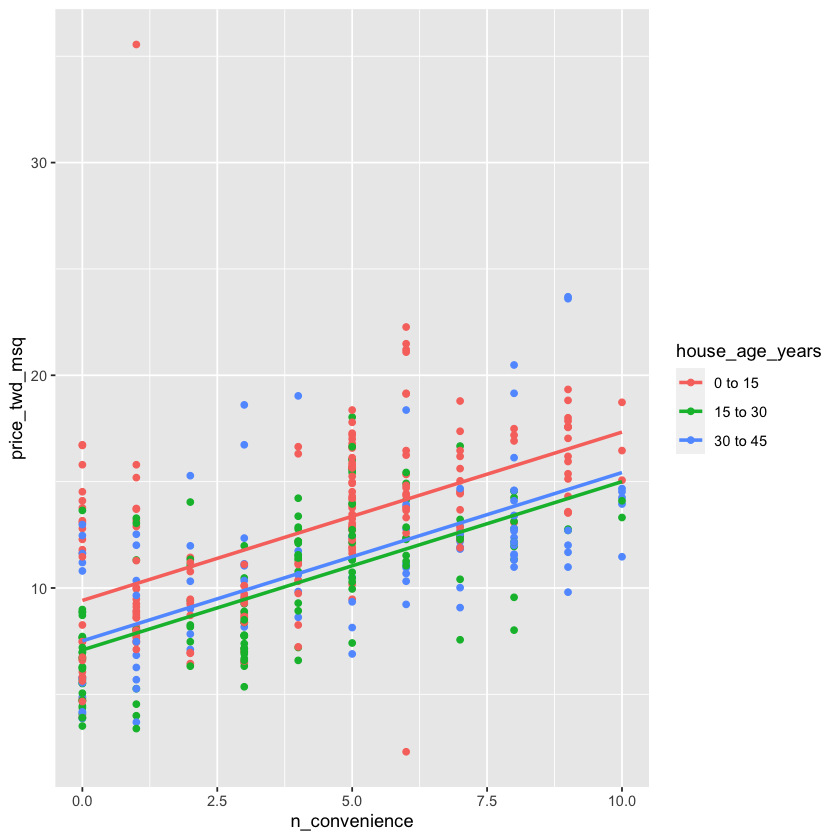

In [18]:
#yes, great, but actually doing the paralel slopes does the job of the prediction
#no? like this previous one
# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience colored by house_age_years
ggplot(taiwan_real_estate,aes(n_convenience,price_twd_msq,
color=house_age_years)) +
  # Add a point layer
  geom_point() +
  # Add parallel slopes, no ribbon
   geom_parallel_slopes(se =FALSE)

Excellent grid expansion of explanatory variables! The workflow for making predictions with multiple explanatory variables is the same as for a single variable, except that you can use expand_grid() to get a more complete set of predictions.

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
,<dbl>,<dbl>,<fct>,<dbl>
1,84.87882,10,30 to 45,11.467474
2,306.59470,9,15 to 30,12.768533
3,561.98450,5,0 to 15,14.311649
4,561.98450,5,0 to 15,16.580938
5,390.56840,5,0 to 15,13.040847
6,2175.03000,3,0 to 15,9.712557


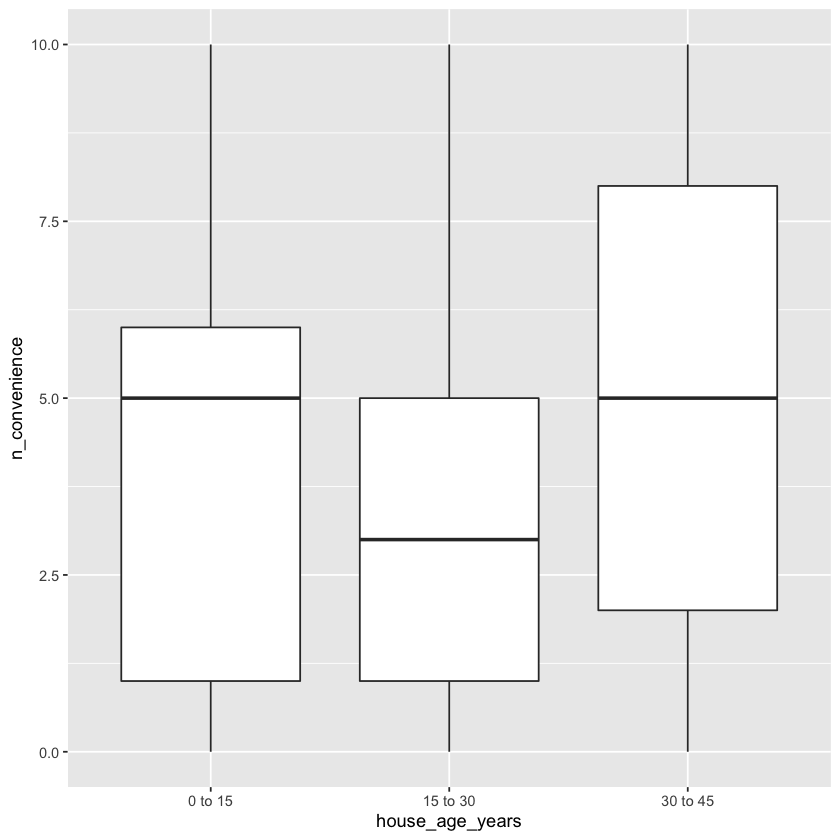

In [19]:
#try anova
head(taiwan_real_estate)
ggplot(taiwan_real_estate,aes(house_age_years,n_convenience))+geom_boxplot()

In [20]:
test.df<-taiwan_real_estate
str(test.df)

'data.frame':	414 obs. of  4 variables:
 $ dist_to_mrt_m  : num  84.9 306.6 562 562 390.6 ...
 $ n_convenience  : num  10 9 5 5 5 3 7 6 1 3 ...
 $ house_age_years: Factor w/ 3 levels "0 to 15","15 to 30",..: 3 2 1 1 1 1 3 2 3 2 ...
 $ price_twd_msq  : num  11.5 12.8 14.3 16.6 13 ...


In [21]:
#transform factors to actual 1, 2, 3
test.df$house_age_years<-as.numeric(test.df$house_age_years)

In [22]:
str(test.df)

'data.frame':	414 obs. of  4 variables:
 $ dist_to_mrt_m  : num  84.9 306.6 562 562 390.6 ...
 $ n_convenience  : num  10 9 5 5 5 3 7 6 1 3 ...
 $ house_age_years: num  3 2 1 1 1 1 3 2 3 2 ...
 $ price_twd_msq  : num  11.5 12.8 14.3 16.6 13 ...


In [23]:
#ok, now let's try an ANOVA
model<-aov(n_convenience~house_age_years,data=test.df)

In [24]:
summary(model)

                 Df Sum Sq Mean Sq F value Pr(>F)  
house_age_years   1     25  24.897   2.883 0.0903 .
Residuals       412   3558   8.637                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [25]:
model.lm.q<-lm(n_convenience~house_age_years+I(house_age_years^2),data=test.df)
#ok, now let's try an ANOVA with quadratic term
model.q<-aov(n_convenience~house_age_years+I(house_age_years^2),data=test.df)
summary(model.q)
summary(model.lm.q)

                      Df Sum Sq Mean Sq F value  Pr(>F)   
house_age_years        1     25   24.90   2.941 0.08711 . 
I(house_age_years^2)   1     79   79.16   9.351 0.00237 **
Residuals            411   3479    8.47                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = n_convenience ~ house_age_years + I(house_age_years^2), 
    data = test.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9053 -3.0316  0.4729  2.0947  6.4729 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.5449     1.0396   6.296 7.86e-10 ***
house_age_years       -3.4336     1.2365  -2.777  0.00574 ** 
I(house_age_years^2)   0.9623     0.3147   3.058  0.00237 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.91 on 411 degrees of freedom
Multiple R-squared:  0.02904,	Adjusted R-squared:  0.02431 
F-statistic: 6.146 on 2 and 411 DF,  p-value: 0.002344


In [26]:
anova(model.q)
library(car)
Anova(model.q)
#but, should not we have a F for the anova model

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
house_age_years,1,24.89655,24.896555,2.940985,0.087111819
I(house_age_years^2),1,79.15870,79.158704,9.350875,0.002374495
Residuals,411,3479.27083,8.465379,NA,NA


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
house_age_years,65.2758,1,7.710912,0.005739902
I(house_age_years^2),79.1587,1,9.350875,0.002374495
Residuals,3479.2708,411,NA,NA


In [27]:
TukeyHSD(model.q)#cannot do poshocs if the data is treated as continuous

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: house_age_years”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: I(house_age_years^2)”


ERROR: Error in TukeyHSD.aov(model.q): no factors in the fitted model


In [28]:
#it is possible, but as a number, cannot be a factor
model.f<-aov(n_convenience~as.factor(house_age_years),data=test.df)
summary(model.f)

                            Df Sum Sq Mean Sq F value  Pr(>F)   
as.factor(house_age_years)   2    104   52.03   6.146 0.00234 **
Residuals                  411   3479    8.47                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
TukeyHSD(model.f)#now you can do it!!
#great explanations here in spanish
#https://biocosas.github.io/R/050_anova.html

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = n_convenience ~ as.factor(house_age_years), data = test.df)

$`as.factor(house_age_years)`
          diff         lwr       upr     p adj
2-1 -0.5465524 -1.32733052 0.2342257 0.2273671
3-1  0.8315789 -0.02839989 1.6915578 0.0605516
3-2  1.3781314  0.45285540 2.3034074 0.0014762


In [ ]:
#is it possible to get the Cohen from this difference? Try later

Manually calculating predictions

As with simple linear regression, you can manually calculate the predictions from the model coefficients. The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. That means you need to consider the case when each each category occurs separately.

taiwan_real_estate, mdl_price_vs_both, and explanatory_data are available; dplyr is loaded.

Instructions 1/2
50 XP
1
2
Get the coefficients from mdl_price_vs_both, assigning to coeffs.
Assign each of the elements of coeffs to the appropriate variable.

In [40]:
# Get the coefficients from mdl_price_vs_both
coeffs <- coefficients(mdl_price_vs_both)
coeffs

# Extract the slope coefficient
slope <- coeffs[1]

# Extract the intercept coefficient for 0 to 15
intercept_0_15 <- coeffs[2]

# Extract the intercept coefficient for 15 to 30
intercept_15_30 <- coeffs[3]

# Extract the intercept coefficient for 30 to 45
intercept_30_45 <- coeffs[4]

n_convenience  house_age_years0 to 15 house_age_years15 to 30 
              0.7914571               9.4133247               7.0851694 
house_age_years30 to 45 
              7.5109583

In [41]:
prediction_data <- explanatory_data %>% 
  mutate(
    # Consider the 3 cases to choose the intercept
    intercept = case_when(
      house_age_years == "0 to 15" ~ intercept_0_15,
      house_age_years == "15 to 30" ~ intercept_15_30,
      house_age_years == "30 to 45" ~ intercept_30_45 
    ),
    # Manually calculate the predictions
    price_twd_msq = intercept + slope * n_convenience
  )

# See the results
prediction_data

n_convenience,house_age_years,intercept,price_twd_msq
<int>,<fct>,<dbl>,<dbl>
0,30 to 45,7.510958,7.510958
0,15 to 30,7.085169,7.085169
0,0 to 15,9.413325,9.413325
1,30 to 45,7.510958,8.302415
1,15 to 30,7.085169,7.876627
1,0 to 15,9.413325,10.204782
2,30 to 45,7.510958,9.093873
2,15 to 30,7.085169,8.668084
2,0 to 15,9.413325,10.996239


This is the case when you've succeeded! Even for more complicated linear regression models, the prediction just involve adding and multiplying coefficients for different cases of explanatory variables.

1. Assessing model performance
The big benefit of using more than one explanatory variable in a model is that you can sometimes get a better fit than when you use a single explanatory variable.

2. Model performance metrics
In the last course, you saw two metrics for measuring model performance: the coefficient of determination, and the residual standard error. The coefficient of determination, sometimes known as the R-squared value, measures how good the regression's prediction line fits the observed values, and a larger number is better. The residual standard error, sometimes abbreviated to RSE, is - loosely speaking - the typical size of the residuals. Let's see if these metrics improve when both explanatory variables are included in the fish model.

3. Getting the coefficient of determination
To easily get the coefficient of determination, load the dplyr and broom packages. Recall that broom's glance function retrieves model-level metrics as a data frame. Then dplyr's pull function can be used to extract the metric we want. The coefficient of determination is called r-dot-squared. For the mass versus species model, the coefficient of determination is zero-point-seven-two, where zero is the worst possible fit and one is a perfect fit. For the mass versus length model, the coefficient of determination is better, at zero-point-eight-two. For the mass versus both model, the coefficient of determination is even higher, at zero-point-nine-seven. Using this metric, the model with both explanatory variables is the best one, since it has the highest coefficient of determination.

4. Adjusted coefficient of determination
Adding more explanatory variables often increases the coefficient of determination for a model, but there is a problem. Including too many explanatory variables in your model can lead to a phenomenon called overfitting. That's when your model is optimized to provide the best fit for that particular dataset, but no longer reflects the general population. In this case, the model would be overfit if it performed well on this fish dataset, but badly on a different fish dataset. A variant metric called adjusted coefficient of determination includes a small penalty term for each additional explanatory variable to compensate for this effect. Its a better metric than the plain coefficient of determination. Its equation is based on the plain coefficient of determination, the number of observations, and the number of explanatory variables, including interactions. The penalty is big enough to worry about if the plain coefficient of determination is small, or if the number of explanatory variables is a sizable fraction of the number of observations. To get this metric, we retrieve the adj-dot-r-dot-squared element from the glanced model.

5. Getting the adjusted coefficient of determination
To see the effect of penalization, let's look at the unadjusted and adjusted coefficients side-by-side. Since each model only contains one or two explanatory variables, the effect is tiny.

6. Getting the residual standard error
The code to get the residual standard error is the same as before, but this time we pull out sigma. The mass versus species model has an RSE of just over three hundred. The mass versus length model has an RSE of about one hundred and fifty. Finally, the mass versus both model has an RSE of just over one hundred, meaning that it typically gets the mass wrong by about one hundred grams. Since that number is the lowest of the three, by this metric, the mass versus both model is best. That means that all metrics indicate that the model with two explanatory variables is better than the models with just one explanatory variable.

7. Let's practice!
Your turn to look at some model metrics.

Comparing coefficients of determination

Recall that the coefficient of determination is a measure of how well the linear regression line fits the observed values. An important motivation for including several explanatory variables in a linear regression is that you can improve the fit compared to considering only a single explanatory variable.

Here you'll compare the coefficient of determination for the three Taiwan house price models, to see which gives the best result.

mdl_price_vs_conv, mdl_price_vs_age, and mdl_price_vs_both are available; dplyr and broom are loaded.

Instructions 1/2
50 XP
1
2
Instructions 1/2
50 XP
1
2
Get the unadjusted and adjusted coefficients of determination for mdl_price_vs_conv by glancing at the model, then selecting the r.squared and adj.r.squared values.
Do the same for mdl_price_vs_age and mdl_price_vs_both.

In [45]:
mdl_price_vs_conv %>% 
  # Get the model-level coefficients
  glance %>% 
  # Select the coeffs of determination
  select(r.squared,adj.r.squared)

# Get the coeffs of determination for mdl_price_vs_age
mdl_price_vs_age %>% 
  glance %>% 
  select(r.squared,adj.r.squared)

# Get the coeffs of determination for mdl_price_vs_both
mdl_price_vs_both %>% 
  glance %>% 
  select(r.squared,adj.r.squared)

r.squared,adj.r.squared
<dbl>,<dbl>
0.3260466,0.3244108


r.squared,adj.r.squared
<dbl>,<dbl>
0.8960122,0.8952532


r.squared,adj.r.squared
<dbl>,<dbl>
0.9313508,0.930681


Comparing coefficients of determination

Recall that the coefficient of determination is a measure of how well the linear regression line fits the observed values. An important motivation for including several explanatory variables in a linear regression is that you can improve the fit compared to considering only a single explanatory variable.

Here you'll compare the coefficient of determination for the three Taiwan house price models, to see which gives the best result.

mdl_price_vs_conv, mdl_price_vs_age, and mdl_price_vs_both are available; dplyr and broom are loaded.

Instructions 2/2
50 XP

2
Instructions 2/2
50 XP

2
Question
Which model does the adjusted coefficient of determination suggest gives a better fit?

Possible Answers

mdl_price_vs_conv.

mdl_price_vs_age.

$$$$$mdl_price_vs_both.

All models are equally good.

Adjusted coefficient of determination doesn't measure the goodness of fit of a regression model.

In [46]:
mdl_price_vs_conv %>% 
  # Get the model-level coefficients
  glance %>% 
  # Pull out the RSE
  pull(sigma)

# Get the RSE for mdl_price_vs_age
mdl_price_vs_age %>% 
  glance %>% 
  # Pull out the RSE
  pull(sigma)


# Get the RSE for mdl_price_vs_both
mdl_price_vs_both %>% 
  glance %>% 
  # Pull out the RSE
  pull(sigma)

[1] 3.383888

[1] 3.950184

[1] 3.21346

Question
Which model does the RSE suggest gives more accurate predictions?

Possible Answers

mdl_price_vs_conv.

mdl_price_vs_age.

$$$$$mdl_price_vs_both.

Both models are equally good.

RSE doesn't measure the accuracy of a regression model.

Resplendent use of RSE! By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.

## 2. Interactions
22%
Explore the effect of interactions between explanatory variables. Considering interactions allows for more realistic models that can have better predictive power. You'll also deal with Simpson's Paradox: a non-intuitive result that arises when you have multiple explanatory variables.

1. Models for each category
The parallel slopes model enforced a common slope for each category. That's not always the best option.

2. 4 categories
Recall that the fish dataset had four different species of fish. One way to give each species a different slope is to run a separate model for each of these.

3. Splitting the dataset
There are many smart ways of splitting a dataset into parts and computing on each part. In base-R, you can use split and lapply. In dplyr, you can use nest_by and mutate. We aren't going to do that. Instead, let's filter for each species one at a time and assign the result to individual variables. I'm choosing this approach partly because I don't want fancy code to get in the way of reasoning about models, and partly because running regression models is such a fundamental task that you need to be able to write the code without thinking, and that takes practice. With this approach, you'll be writing the modeling code for every category in the dataset.

4. 4 models
Now we have four datasets, we can run four models. Again, there's no fancy looping, just the same model four times. Observe that each model gives a different intercept and a different slope.

5. Explanatory data
To make predictions with these models, we first have to create a data frame of explanatory variables. The good news is that since each model has the same explanatory variable, you only have to write this code once. Give your copy and paste fingers a rest.

6. Making predictions
Predicting follows the now familiar flow. Add a column with mutate, name it after the response variable, call predict with the model and the explanatory data. The only difference in each case is the model variable. It isn't necessary for calculating the predictions, but to make the plotting code you are about to see easier, I've also included the species in each prediction dataset.

7. Visualizing predictions
Here's the standard ggplot for showing linear regression predictions. geom_point makes it a scatter plot, and geom_smooth with method equals "lm" provides prediction lines. Unlike the parallel slopes case, each line has its own slope. This is achieved by setting the color aesthetic.

8. Adding in your predictions
To sanity check our predictions, we add them to the plot to see if they align with what ggplot2 calculated. The size and shape are changed to help them stand out. Thankfully, each line of squares follows ggplot's trend lines.

9. Coefficient of determination
An important question here is are these models better? The coefficient of determination for a model on the whole fish dataset is point-nine-two. Now here's the coefficient of determination for each of the individual models. The pike number is higher, indicating a better fit, though the numbers for the other models are lower.

10. Residual standard error
Here's the residual standard error for the whole dataset model, one hundred and three. For the individual models, this time the pike residual standard error is higher, indicating larger differences between actual and predicted values, but the other models show an improvement over the whole dataset model. This mixed performance result is quite common: the whole dataset model benefits from the increased power of more rows of data, whereas individual models benefit from not having to satisfy differing components of data.

11. Let's practice!
Let's try this on the housing data.